In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from matplotlib.patches import Patch

In [18]:
genes = ["ha", "na", "np", "ns", "pa" , "mp" , "pb1" , "pb2"]
clades = ["canineH3N2", "equine", "human", 
          "swineEuro", "avianEurasia", "avianNA", "swineNA"]

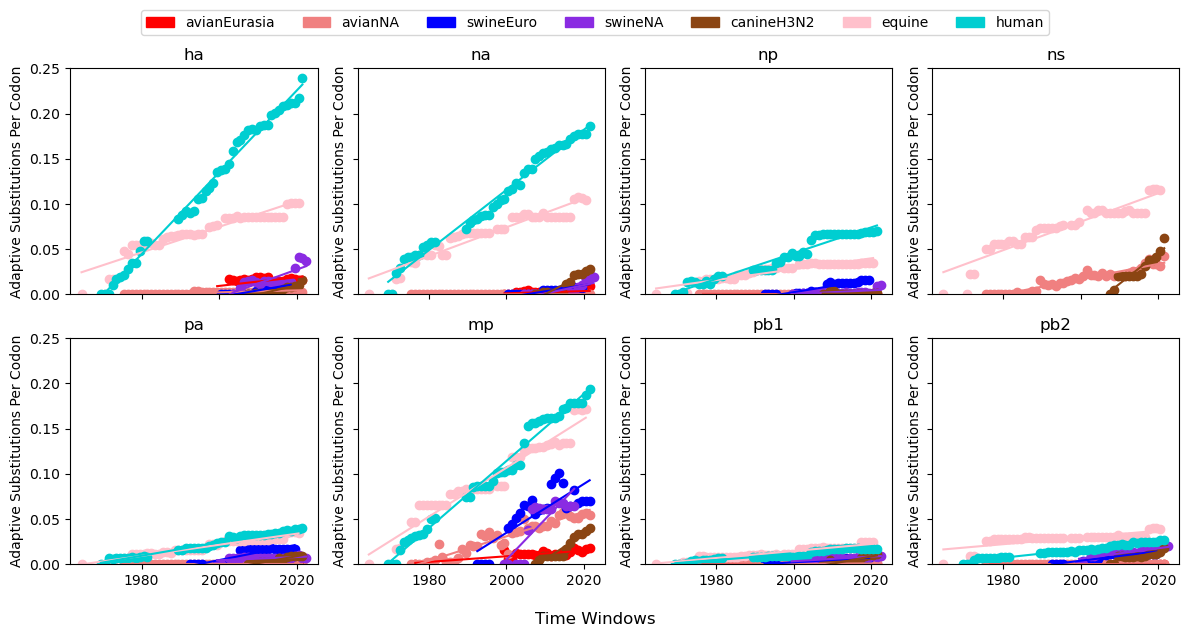

In [28]:
clade_colors = {
    'avianEurasia': 'red',
    'avianNA': 'lightcoral',
    'swineEuro': 'blue',
    'swineNA': 'blueviolet',
    'canineH3N2': 'saddlebrown',
    'equine': 'pink',
    'human': 'darkturquoise'
}

clades = list(clade_colors.keys())

num_genes = len(genes)
num_columns = 4
num_rows = (num_genes + num_columns - 1) // num_columns 

fig, axs = plt.subplots(num_rows, num_columns, sharex=True, sharey=True, figsize=(12, 3 * num_rows))
axs = axs.flatten()

for clade_index, clade in enumerate(clades):
    clade_color = clade_colors.get(clade)

    for i, gene in enumerate(genes):
        path = f"./results/{clade}/h3nx_{gene}_3_3_adaptation_bootstrapped.json"
        if os.path.exists(path):
            with open(path, "r") as file:
                jsonData = json.load(file)

            x = jsonData['window_midpoint']
            y = jsonData['adaptive_substitutions_per_codon']

            axs[i].scatter(x, y, label=clade, color=clade_color)
            
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            axs[i].plot(x, slope * np.array(x) + intercept, color=clade_color)

            axs[i].set_title(f"{gene}")
            axs[i].set_ylabel("Adaptive Substitutions Per Codon")
            axs[i].set_ylim(0, 0.25)

legend_handles = [Patch(color=color, label=clade) for clade, color in clade_colors.items()]

fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(clade_colors))
fig.supxlabel("Time Windows", fontsize=12)
plt.tight_layout()
plt.show()


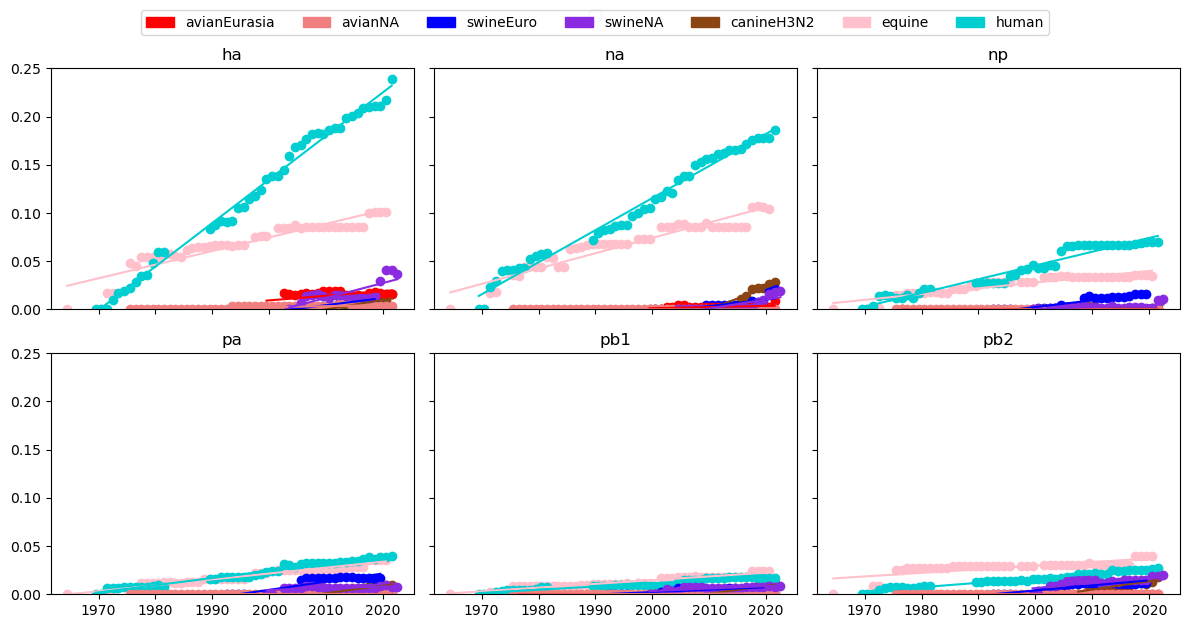

In [35]:
#WITHOUT NS AND MP
genes = ["ha", "na", "np", "pa" , "pb1" , "pb2"]
clades = ["canineH3N2", "equine", "human", 
          "swineEuro", "avianEurasia", "avianNA", "swineNA"]

clade_colors = {
    'avianEurasia': 'red',
    'avianNA': 'lightcoral',
    'swineEuro': 'blue',
    'swineNA': 'blueviolet',
    'canineH3N2': 'saddlebrown',
    'equine': 'pink',
    'human': 'darkturquoise'
}

num_genes = len(genes)
num_columns = 3
num_rows = (num_genes + num_columns - 1) // num_columns 

fig, axs = plt.subplots(num_rows, num_columns, sharex=True, sharey=True, figsize=(12, 3 * num_rows), label='')
fig.legend(clades, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(clades))
axs = axs.flatten()

for clade_index, clade in enumerate(clades):
    clade_color = clade_colors.get(clade, 'black')  # Default to black if clade not in the dictionary

    for i, gene in enumerate(genes):
        # Calculate the subplot index based on the number of columns
        subplot_index = i % num_columns + (i // num_columns) * num_columns

        # Break the loop if we exceed the number of genes
        if i >= num_genes:
            break

        path = f"./results/{clade}/h3nx_{gene}_3_3_adaptation_bootstrapped.json"
        if os.path.exists(path):
            with open(path, "r") as file:
                jsonData = json.load(file)

            x = jsonData['window_midpoint']
            y = jsonData['adaptive_substitutions_per_codon']

            axs[subplot_index].scatter(x, y, label=clade, color=clade_color)
            
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            axs[subplot_index].plot(x, slope * np.array(x) + intercept, color=clade_color)

            axs[subplot_index].set_title(f"{gene}")
            axs[subplot_index].set_ylim(0, 0.25)

legend_handles = [Patch(color=color, label=clade) for clade, color in clade_colors.items()]

fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(clade_colors))
#remove extra subplots if present
for i in range(num_genes, len(axs)):
    fig.delaxes(axs[i])


plt.tight_layout()
plt.show()